In [2]:
# Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [20]:
path = r"C:\Users\fardi\OneDrive\Desktop\CF\Data Immersion\Python Fundamentals for Data Analysts\06-09-2021 Instacart Basket Analysis"

In [4]:
# Load complete dataset
orders_products_all = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_all.pkl'))

#### Creating Bar Charts

In [1]:
# bar chart for orders_day_of_week
bar1 = orders_products_all['orders_day_of_week'].value_counts().plot.bar()

NameError: name 'orders_products_all' is not defined

In [30]:
bar1.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'orders_day_of_week_bar.png'))

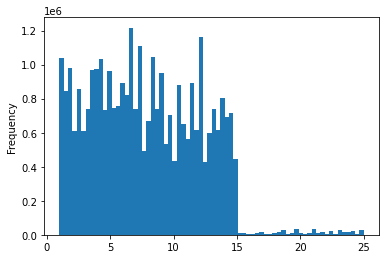

In [31]:
# creating a histogram of the “prices” column
hist1 = orders_products_all['prices'].plot.hist(bins = 70)

In [32]:
hist1.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'prices_hist1.png'))

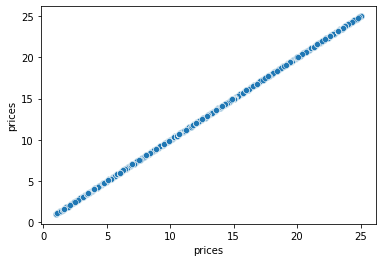

In [43]:
# creating a scatterplot for prices
scat1 = sns.scatterplot(x = 'prices', y = 'prices',data = orders_products_all)

In [45]:
scat1.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'prices_scat1.png'))

### sampling 

In [5]:
# Set the seed for the random number generator (for reproducibilty)
np.random.seed(4)

In [6]:
dev = np.random.rand(len(orders_products_all)) <= 0.7

In [7]:
# 70 percent of the rows of dataFrame stored into big 
big = orders_products_all[dev]

In [8]:
# 30 percent of the rows stored into small
small = orders_products_all[~dev]

In [9]:
len(orders_products_all)

32404859

In [10]:
len(big) + len(small)

32404859

Checking if everything if fine- as they should have same len

In [16]:
# selecting only the needed columns
df_3 = small[['orders_day_of_week','prices']]

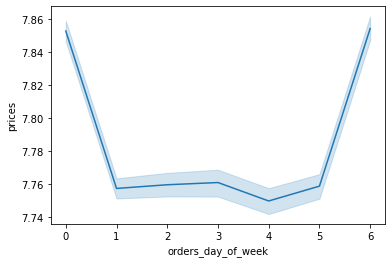

In [18]:
# Creating line plot
line = sns.lineplot(data = df_3, x = 'orders_day_of_week',y = 'prices')

In [46]:
line.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'order_day_of_week_prices_line.png'))

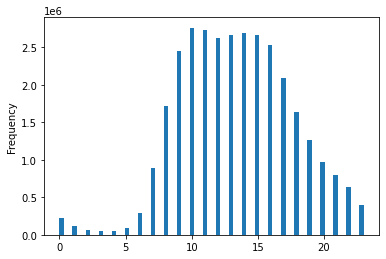

In [48]:
# histogram of the “order_hour_of_day” column
bar_2 = orders_products_all['order_hour_of_day'].plot.hist(bins = 70)

The histogram demonstrates that orders are the most during 10 to 17. 

In [49]:
bar_2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'order_hour_of_day_bar2.png'))

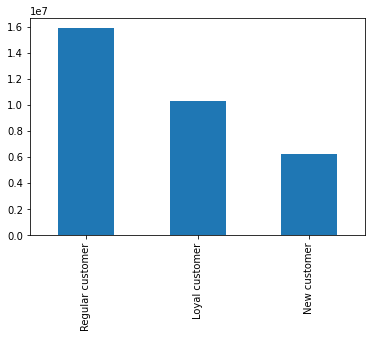

In [50]:
# bar chart from the “loyalty_flag” column
bar_3 = orders_products_all['loyalty_flag'].value_counts().plot.bar()

Regular customer order the most, followed by loyal customer and finally new customer

In [51]:
bar_3.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'loyalty_flag_bar3.png'))

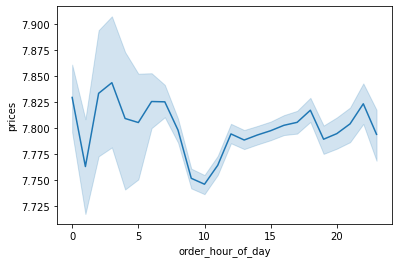

In [22]:
# whether there’s a difference in expenditure (the “prices” column) depending on the hour of the day
df_5 = small[['order_hour_of_day','prices']]
line_3 = sns.lineplot(data = df_5, x = 'order_hour_of_day',y = 'prices')

The line chart flunctuates, this confirm that there’s a difference in expenditure (the “prices” column) depending on the hour of the day

In [26]:
line_3.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'order_hour_of_day_prices.png'))

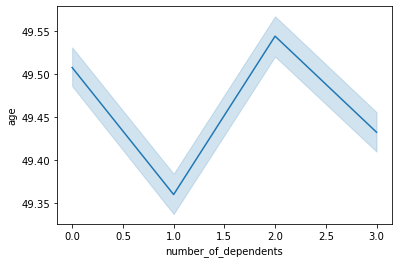

In [23]:
# line chart exploring the connections between age and number of dependents
df_6 = small[['number_of_dependents','age']]
line_4 = sns.lineplot(data = df_6, x = 'number_of_dependents',y = 'age')

There is not clear relationship as its not a straigh line

In [24]:
line_4.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'number_of_dependents_age.png'))

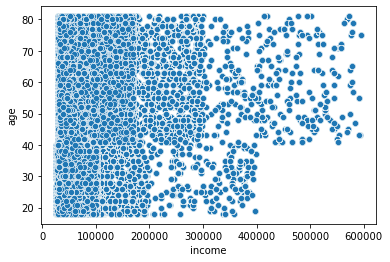

In [11]:
# explore whether there’s a connection between age and spending power
df_7 = small[['income','age']]
scat4 = sns.scatterplot(x = 'income', y = 'age',data = df_7)

In [12]:
scat4.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'spender_flag_age_scat4.png'))

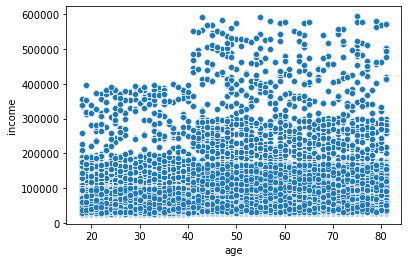

In [13]:
# explore whether there’s a connection between age and spending power
scat5 = sns.scatterplot(x = 'age', y = 'income',data = df_7)

In [14]:
scat5.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'spender_flag_age_scat5.png'))

We could say that as age increase the income power also have more tendency to increase, as there are more higher values of income for ages above 40

In [16]:
df_8 = small[['state', 'spender_flag']]

In [18]:
df_8.loc[df_8['state'] in ('Maine','New Hampshire','Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 'Pennsylvania', 'New Jersey), 'region'] = 'Region 1'

SyntaxError: invalid syntax (<ipython-input-18-e73f220eb7df>, line 1)

In [ ]:
'Maine','New Hampshire','Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 'Pennsylvania', 'New Jersey'


In [15]:
small.columns

Index(['order_id', 'user_id', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', 'product_name', 'aisle_id',
       'department_id', 'prices', 'price_range_loc', 'busiest_day',
       'busiest_days', 'busiest_period_of_day', 'max_order', 'loyalty_flag',
       'mean_price', 'spender_flag', 'median_order', 'frequency_flag',
       'family_name', 'gender', 'state', 'age', 'number_of_dependents',
       'family_status', 'income'],
      dtype='object')

In [22]:
reg = pd.read_csv(os.path.join(path, '02 Data', 'Original Data', 'region.csv'), index_col = False)

In [23]:
reg.head()

,state,region
0,Maine,Region 1
1,New Hampshire,Region 1
2,Vermont,Region 1
3,Massachusetts,Region 1
4,Rhode Island,Region 1


In [24]:
reg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   state   51 non-null     object
 1   region  51 non-null     object
dtypes: object(2)
memory usage: 944.0+ bytes


In [28]:
reg.shape

(51, 2)

In [29]:
small.shape

(9721098, 30)

In [27]:
small.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,spender_flag,median_order,frequency_flag,family_name,gender,state,age,number_of_dependents,family_status,income
0,2539329,1,1,2,8,0.0,196,1,0,Soda,...,Low spender,20.0,Regular customer,Nguyen,Female,Alabama,31,3,married,40423
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,Low spender,20.0,Regular customer,Nguyen,Female,Alabama,31,3,married,40423
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,Low spender,20.0,Regular customer,Nguyen,Female,Alabama,31,3,married,40423
6,550135,1,7,1,9,20.0,196,1,1,Soda,...,Low spender,20.0,Regular customer,Nguyen,Female,Alabama,31,3,married,40423
10,2539329,1,1,2,8,0.0,14084,2,0,Organic Unsweetened Vanilla Almond Milk,...,Low spender,20.0,Regular customer,Nguyen,Female,Alabama,31,3,married,40423


In [30]:
small_all = small.merge(reg, on = ['state'], how = 'inner',indicator = True)

In [31]:
small_all['_merge'].value_counts()

both          9721098
left_only           0
right_only          0
Name: _merge, dtype: int64

In [33]:
df_9 = small_all[['state', 'region']]

In [34]:
df_9.head(100)

,state,region
0,Alabama,Region 3
1,Alabama,Region 3
2,Alabama,Region 3
3,Alabama,Region 3
4,Alabama,Region 3
...,...,...
95,Alabama,Region 3
96,Alabama,Region 3
97,Alabama,Region 3
98,Alabama,Region 3


In [35]:
df_9['region'].value_counts(dropna=False)

Region 3     3238633
Region 4     2488967
Region 2     2278151
Region 1     1715347
Name: region, dtype: int64

In [38]:
df_9.isnull().sum()

state     0
region    0
dtype: int64

In [39]:
small.loc[small['order_number'] < 5, 'exclusion_flag'] = 'low-activity customers'

C:\Users\fardi\anaconda3\lib\site-packages\pandas\core\indexing.py:1599: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
C:\Users\fardi\anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [40]:
small['exclusion_flag'].value_counts(dropna=False)

NaN                       7322981
low-activity customers    2398117
Name: exclusion_flag, dtype: int64

In [41]:
small.loc[small['order_number'] >= 5, 'exclusion_flag'] = 'high-activity customers'

C:\Users\fardi\anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [42]:
small['exclusion_flag'].value_counts(dropna=False)

high-activity customers    7322981
low-activity customers     2398117
Name: exclusion_flag, dtype: int64

In [43]:
small.drop(small.index[small['exclusion_flag'] == 'low-activity customers'], inplace = True)

C:\Users\fardi\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [44]:
small['exclusion_flag'].value_counts(dropna=False)

high-activity customers    7322981
Name: exclusion_flag, dtype: int64

In [45]:
small.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7322981 entries, 6 to 32404850
Data columns (total 31 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   order_id                int64  
 1   user_id                 int64  
 2   order_number            int64  
 3   orders_day_of_week      int64  
 4   order_hour_of_day       int64  
 5   days_since_prior_order  float64
 6   product_id              int64  
 7   add_to_cart_order       int64  
 8   reordered               int64  
 9   product_name            object 
 10  aisle_id                int64  
 11  department_id           int64  
 12  prices                  float64
 13  price_range_loc         object 
 14  busiest_day             object 
 15  busiest_days            object 
 16  busiest_period_of_day   object 
 17  max_order               int64  
 18  loyalty_flag            object 
 19  mean_price              float64
 20  spender_flag            object 
 21  median_order            float6

In [47]:
small.shape

(7322981, 31)